In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hotel Reservations (1).csv')

In [3]:
df.shape

(36275, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
print(df.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = df[numerical_cols][df[numerical_cols] < 0].dropna(how='all')

if not negative_values.empty:
    print("Negative Values Found:\n", negative_values)
else:
    print("No negative values found in numerical columns.")

No negative values found in numerical columns.


In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Booking_ID': ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
Unique values in 'type_of_meal_plan': ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values in 'room_type_reserved': ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values in 'market_segment_type': ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values in 'booking_status': ['Not_Canceled' 'Canceled']


In [11]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
duplicates = df.duplicated()
print(df[duplicates])
print(f"Number of duplicate rows: {duplicates.sum()}")

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []
Number of duplicate rows: 0


In [13]:
print(df.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [14]:
print(df['booking_status'].value_counts())

print(df['booking_status'].value_counts(normalize=True) * 100)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


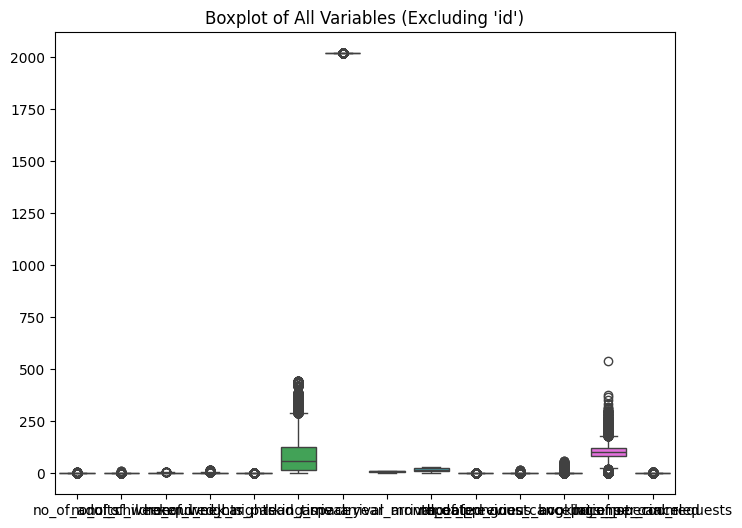

In [15]:
df_filtered = df.drop(columns=['Booking_ID'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered)
plt.title("Boxplot of All Variables (Excluding 'id')")
plt.show()

In [16]:
import pandas as pd
import numpy as np

# Function to calculate outliers using IQR
def count_outliers(df):
    outlier_counts = {}

    for col in df.select_dtypes(include=[np.number]):  # Only numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]  # Number of outliers in the column

    return outlier_counts

# Get the outlier count for each column
outlier_results = count_outliers(df)

# Print results
for col, count in outlier_results.items():
    print(f"Number of outliers in '{col}': {count}")


Number of outliers in 'no_of_adults': 10167
Number of outliers in 'no_of_children': 2698
Number of outliers in 'no_of_weekend_nights': 21
Number of outliers in 'no_of_week_nights': 324
Number of outliers in 'required_car_parking_space': 1124
Number of outliers in 'lead_time': 1331
Number of outliers in 'arrival_year': 6514
Number of outliers in 'arrival_month': 0
Number of outliers in 'arrival_date': 0
Number of outliers in 'repeated_guest': 930
Number of outliers in 'no_of_previous_cancellations': 338
Number of outliers in 'no_of_previous_bookings_not_canceled': 812
Number of outliers in 'avg_price_per_room': 1696
Number of outliers in 'no_of_special_requests': 761


In [17]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Potential outliers detected in '{col}'\n", outliers[[col]])

Potential outliers detected in 'no_of_adults'
        no_of_adults
2                 1
8                 3
10                1
11                1
13                1
...             ...
36260             3
36261             1
36263             1
36268             1
36270             3

[10167 rows x 1 columns]
Potential outliers detected in 'no_of_children'
        no_of_children
32                  2
60                  2
80                  2
95                  1
99                  2
...               ...
36221               2
36227               2
36231               1
36249               2
36269               2

[2698 rows x 1 columns]
Potential outliers detected in 'no_of_weekend_nights'
        no_of_weekend_nights
539                       6
1588                      6
2296                      6
2710                      6
6929                      6
7160                      6
8528                      6
14275                     6
16977                     6
17938         

In [18]:
df.drop(columns=['Booking_ID'], inplace=True)

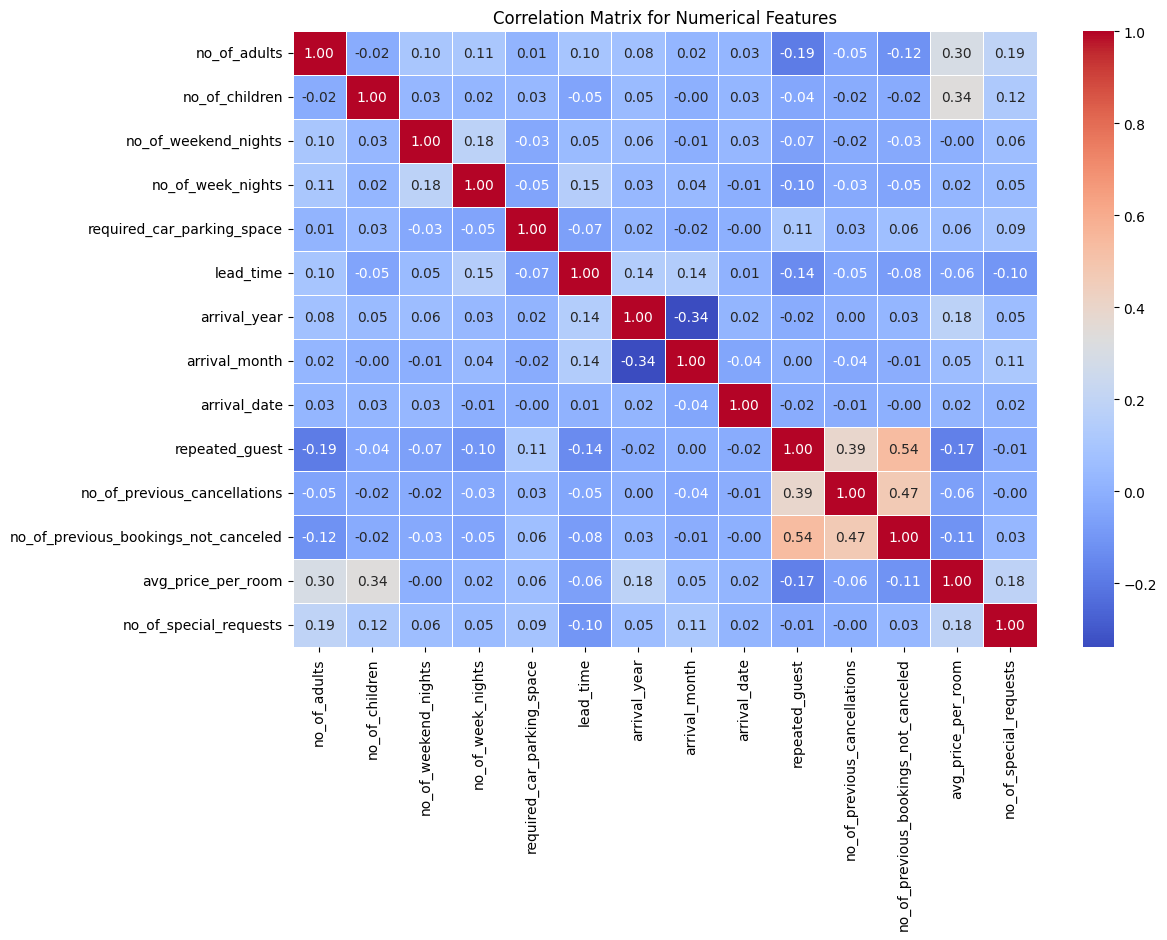

In [19]:
df_numeric = df.select_dtypes(include=['int64', 'float64']).astype(float)

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjust size if needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix for Numerical Features")

# Show plot
plt.show()

In [20]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])

In [22]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Dataset after Standard Scaling:")
print(df_scaled.head())

Dataset after Standard Scaling:
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.298893        -0.26147              0.217401          -0.144803   
1      0.298893        -0.26147              1.365993           0.563972   
2     -1.628975        -0.26147              1.365993          -0.853578   
3      0.298893        -0.26147             -0.931190          -0.144803   
4      0.298893        -0.26147              0.217401          -0.853578   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                   -0.178819   1.614896     -2.137469       0.839242   
1                   -0.178819  -0.933701      0.467843       1.164990   
2                   -0.178819  -0.980250      0.467843      -1.766747   
3                   -0.178819   1.463610      0.467843      -0.789501   
4                   -0.178819  -0.433291      0.467843      -1.115250   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Focus on correlation with 'booking_status'
target_corr = corr_matrix["booking_status"]

# Sort features by absolute correlation value
important_features_corr = target_corr.abs().sort_values(ascending=False)

# Display top correlated features
print("Top features correlated with booking status:\n", important_features_corr)


Top features correlated with booking status:
 booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
market_segment_type_Corporate           0.112993
repeated_guest                          0.107287
market_segment_type_Online              0.106362
no_of_week_nights                       0.092996
no_of_adults                            0.086920
type_of_meal_plan_Meal Plan 2           0.086370
required_car_parking_space              0.086185
market_segment_type_Complementary       0.072867
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
market_segment_type_Offline             0.038351
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
room_type_reserved_Room_Type 6          0.032652
room_type_reserved_Room

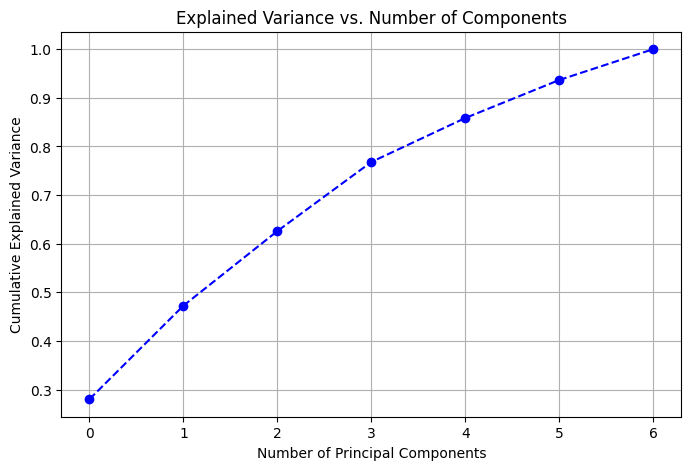

Explained variance per component: [0.28  0.192 0.153 0.142 0.09  0.078 0.063]


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# List of selected features from the correlation matrix
selected_features = [
    "lead_time", "arrival_year", "arrival_month", "arrival_date",
    "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled"
]

# Filter dataset for selected features
df_selected = df[selected_features]

# Standardize the data (PCA requires standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

# Print explained variance for each component
print("Explained variance per component:", np.round(explained_variance, 3))

In [25]:
# Define target variable (modify based on dataset)
target = "booking_status"

# Split dataset into features (X) and target (y)
X = df[selected_features]
y = df[target]

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data separately to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)  # Transform test using same scaler

# Apply PCA
pca = PCA(n_components=3)  # Keep top 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on train data
X_test_pca = pca.transform(X_test_scaled)  # Transform test data

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predict on test data
y_pred = knn.predict(X_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      2416
           1       0.82      0.87      0.84      4839

    accuracy                           0.78      7255
   macro avg       0.76      0.74      0.75      7255
weighted avg       0.78      0.78      0.78      7255



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data1 = df.copy()
data1 = data1.drop(columns=['id'], errors='ignore')  # Drop 'id' column if exists

# Separate features and target
X = data1.drop(columns='booking_status')  # Features
y = data1['booking_status']  # Target

# Handle missing values if any
X.fillna(X.median(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to DataFrame with column names for feature access
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Forward selection function
def forward_selection(X_train, y_train):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_score = 0  # Start with a baseline score

    while remaining_features:
        scores_with_candidates = []

        # Try adding each remaining feature and evaluate its score
        for feature in remaining_features:
            X_train_temp = X_train[selected_features + [feature]]  # Add feature to selected set
            model = LogisticRegression(max_iter=1000)  # Logistic Regression model
            model.fit(X_train_temp, y_train)
            score = model.score(X_train_temp, y_train)  # Evaluate the model's score
            scores_with_candidates.append((score, feature))

        # Sort scores by the model score (descending)
        scores_with_candidates.sort(reverse=True, key=lambda x: x[0])

        # Select the feature with the best score
        best_score, best_feature = scores_with_candidates[0]  # Top feature after sorting

        # Add the feature with the best score to the selected set
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)  # Remove the feature from remaining ones

    return selected_features

# Running forward selection to get the best features
selected_features_forward = forward_selection(X_train, y_train)
print("Selected features by forward selection:", selected_features_forward)

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of components after PCA
print(f"Number of components after PCA: {X_train_pca.shape[1]}")

# Train the model using the selected features
X_train_selected = X_train[selected_features_forward]
X_test_selected = X_test[selected_features_forward]

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model after PCA: {accuracy}')

Selected features by forward selection: ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'market_segment_type_Online', 'arrival_year', 'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 6', 'no_of_adults', 'room_type_reserved_Room_Type 2', 'type_of_meal_plan_Meal Plan 3', 'no_of_previous_cancellations', 'room_type_reserved_Room_Type 3', 'market_segment_type_Complementary', 'room_type_reserved_Room_Type 7', 'required_car_parking_space', 'type_of_meal_plan_Not Selected', 'no_of_previous_bookings_not_canceled', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'market_segment_type_Corporate', 'repeated_guest', 'no_of_children', 'no_of_week_nights', 'arrival_date', 'arrival_month', 'no_of_weekend_nights', 'market_segment_type_Offline']
Number of components after PCA: 23
Accuracy of Logistic Regression model after PCA: 0.8068547275567398


In [27]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train[selected_features], y_train)

# Predictions & Accuracy
y_pred = svm_model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM model: {accuracy:.4f}')

Accuracy of SVM model: 0.7599


C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_5152\1897344548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_status', data=df, palette='coolwarm')


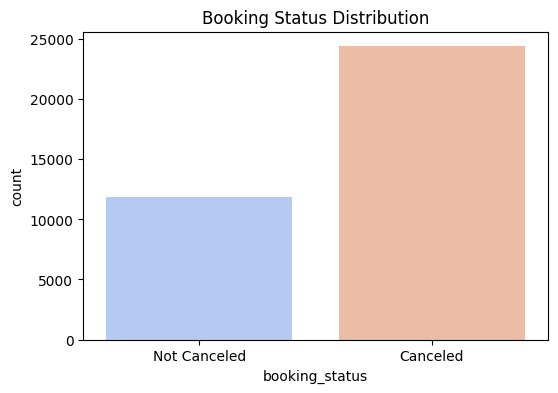

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title("Booking Status Distribution")
plt.show()

In [29]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_5152\3939545897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['booking_status'], y=df[col], palette="coolwarm")
C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_5152\3939545897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['booking_status'], y=df[col], palette="coolwarm")
C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_5152\3939545897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['booking_status'], y=df[col], palette="coolwarm")
C:\Users\DYNABOOK\AppData\Local\Te

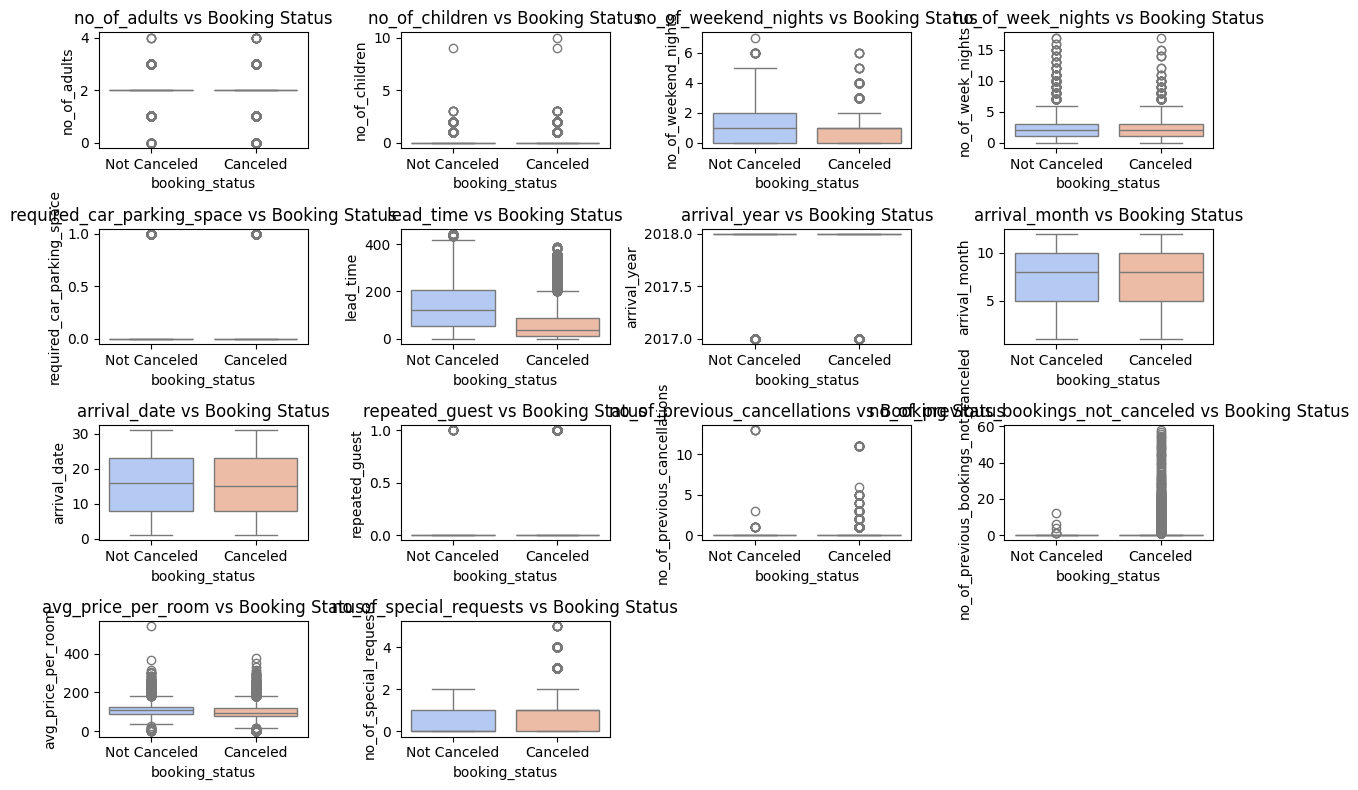

In [30]:
numerical_cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
    'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 
    'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'
]

# Plot boxplots to show distribution of numerical features based on booking status
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size as needed
    sns.boxplot(x=df['booking_status'], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs Booking Status")
    plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

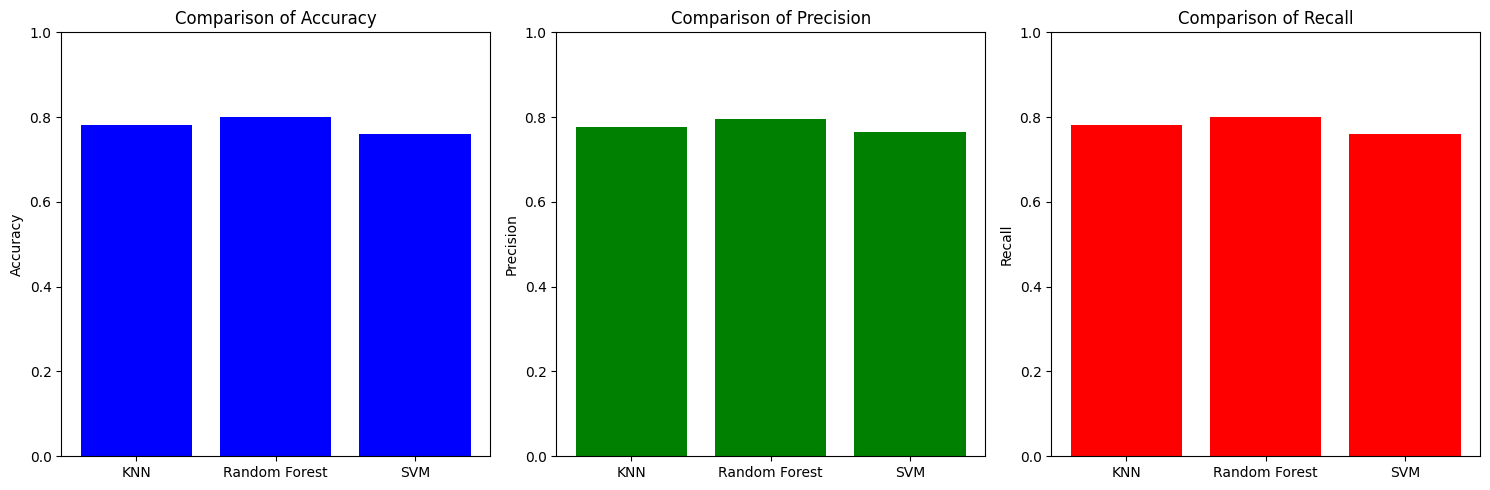

In [31]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define target variable (modify based on dataset)
target = "booking_status"

# Split dataset into features (X) and target (y)
X = df[selected_features]
y = df[target]

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data separately to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=3)  # Keep top 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": []}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))

# Convert results to numpy arrays for plotting
x_labels = results["Model"]
x = np.arange(len(x_labels))

# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]
colors = ['blue', 'green', 'red']

for i, metric in enumerate(metrics):
    axes[i].bar(x, results[metric], color=colors[i])
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(x_labels)
    axes[i].set_title(f"Comparison of {metric}")
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


c:\Users\DYNABOOK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DYNABOOK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

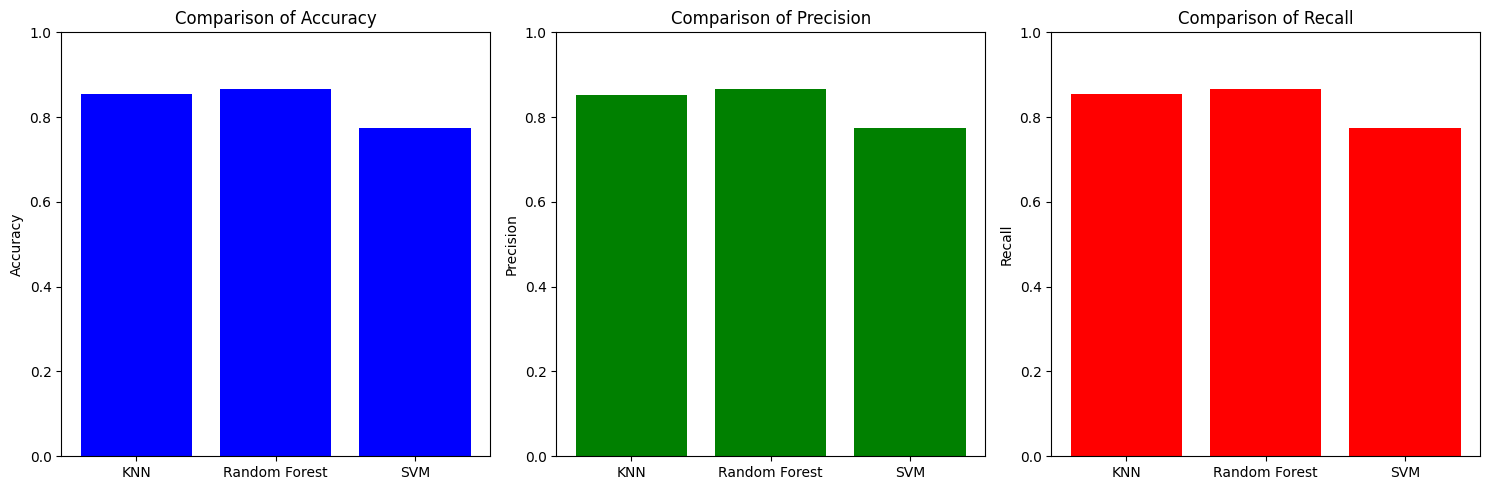

Selected Features: Index(['required_car_parking_space', 'lead_time', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Online'],
      dtype='object')


In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# Define target variable (modify based on dataset)
target = "booking_status"

# Create a copy of the dataset for forward selection
data1 = df.copy()

# Split dataset into features (X) and target (y)
X = data1.drop(columns=[target])
y = data1[target]

# Perform forward selection using logistic regression as the estimator
selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='forward')
X_selected = selector.fit_transform(X, y)
forward_selected_features = X.columns[selector.get_support()]

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale data separately to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=3)  # Keep top 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": []}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))

# Convert results to numpy arrays for plotting
x_labels = results["Model"]
x = np.arange(len(x_labels))

# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]
colors = ['blue', 'green', 'red']

for i, metric in enumerate(metrics):
    axes[i].bar(x, results[metric], color=colors[i])
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(x_labels)
    axes[i].set_title(f"Comparison of {metric}")
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print selected features
print("Selected Features:", forward_selected_features)

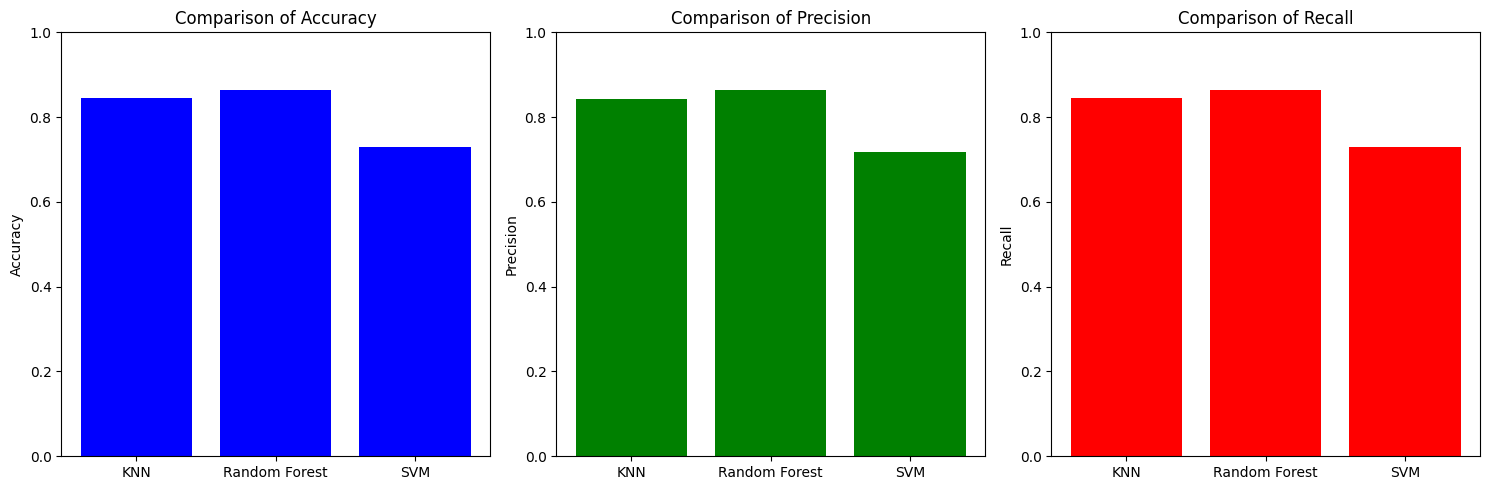

Selected Features: Index(['lead_time', 'arrival_month', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Offline'],
      dtype='object')


In [33]:
# Define target variable (modify based on dataset)
target = "booking_status"

# Create a copy of the dataset for backward elimination
data1 = df.copy()

# Split dataset into features (X) and target (y)
X = data1.drop(columns=[target])
y = data1[target]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Sequential Feature Selection (Backward Elimination)
selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='backward', n_jobs=-1)
X_selected = selector.fit_transform(X, y)
backward_selected_features = X.columns[selector.get_support()]

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale data separately to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=3)  # Keep top 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define models with parallelization for speed
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),  # Enable parallelization for KNN
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),  # Enable parallelization for RandomForest
    "SVM": SVC(kernel='linear', random_state=42)
}

# Store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": []}

# Train and evaluate models
for name, model in models.items():
    # Using cross-validation to speed up model evaluation (instead of a single train-test split)
    accuracy = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    precision = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='precision_weighted', n_jobs=-1).mean()
    recall = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='recall_weighted', n_jobs=-1).mean()
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)

# Convert results to numpy arrays for plotting
x_labels = results["Model"]
x = np.arange(len(x_labels))

# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]
colors = ['blue', 'green', 'red']

for i, metric in enumerate(metrics):
    axes[i].bar(x, results[metric], color=colors[i])
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(x_labels)
    axes[i].set_title(f"Comparison of {metric}")
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print selected features
print("Selected Features:", backward_selected_features)


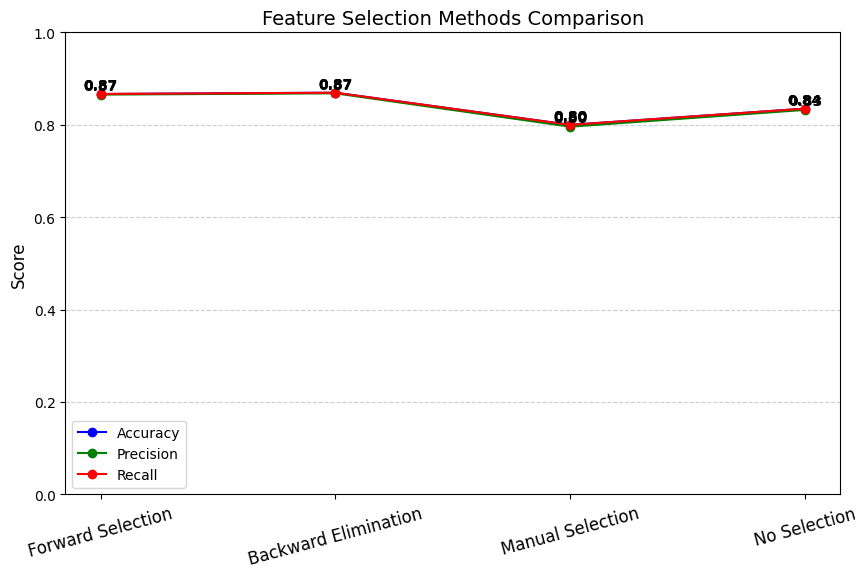

In [34]:
feature_selection_methods = {
    "Forward Selection": forward_selected_features,
    "Backward Elimination": backward_selected_features,
    "Manual Selection": selected_features,
    "No Selection": X.columns  # All features included
}

# Store results dynamically
fs_results = {"Method": [], "Accuracy": [], "Precision": [], "Recall": []}

for method_name, selected_features in feature_selection_methods.items():
    # Select features from dataset
    X_selected = X[selected_features]

    # Split into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a classifier (Random Forest for consistency)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Store evaluation metrics
    fs_results["Method"].append(method_name)
    fs_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    fs_results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    fs_results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))

# Convert to numpy arrays for plotting
x_labels = fs_results["Method"]
x = np.arange(len(x_labels))

# Define metrics and colors
metrics = ["Accuracy", "Precision", "Recall"]
colors = ['blue', 'green', 'red']

# Create the plot
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(x, fs_results[metric], marker='o', linestyle='-', color=colors[i], label=metric)

    # Adding value labels
    for j, value in enumerate(fs_results[metric]):
        plt.text(j, value + 0.01, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

# Customize the chart
plt.xticks(x, x_labels, rotation=15, fontsize=12)
plt.title("Feature Selection Methods Comparison", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)  # Assuming values are between 0 and 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()